Label mapping: {0: 'New', 1: 'Used', 2: 'Degraded'}
Performing feature selection...


j:\Projects\1. Python\2. EIS All\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



Mean importance threshold: 0.0588
Features ranked by importance:
 1. Mean_Magnitude       (0.2705)
 2. Std_Imaginary        (0.1638)
 3. Std_Real             (0.1192)
 4. Max_Imaginary        (0.0962)
 5. Max_Real             (0.0544)
 6. Min_Real             (0.0526)
 7. Min_Imaginary        (0.0441)
 8. Slope_Imag_Frequency (0.0288)
 9. Low_Freq_Imag_Mean   (0.0278)
10. Imag_Low_High_Ratio  (0.0273)
11. Mean_Real            (0.0208)
12. High_Freq_Real_Mean  (0.0201)
13. Mean_Imaginary       (0.0181)
14. Slope_Real_Frequency (0.0181)
15. Low_Freq_Real_Mean   (0.0160)
16. High_Freq_Imag_Mean  (0.0141)
17. Real_Low_High_Ratio  (0.0083)

Features above the mean threshold:
 - Mean_Magnitude       (0.2705) ✓
 - Std_Imaginary        (0.1638) ✓
 - Std_Real             (0.1192) ✓
 - Max_Imaginary        (0.0962) ✓

Reduced number of features from 17 to 4

Selected features mapping:
Feature_0 = Std_Real             (importance: 0.1192)
Feature_1 = Std_Imaginary        (importance: 0.1638)
Fea

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,363 (13.14 KB)

 Trainable params: 3,171 (12.39 KB)

 Non-trainable params: 192 (768.00 B)

Class weights: {0: np.float64(0.9393939393939394), 1: np.float64(1.0333333333333334), 2: np.float64(1.0333333333333334)}
Training the model...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.2965 - loss: 1.6426 - val_accuracy: 0.1818 - val_loss: 1.4386 - learning_rate: 5.0000e-04
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4899 - loss: 1.2967 - val_accuracy: 0.0000e+00 - val_loss: 1.4227 - learning_rate: 5.0000e-04
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5828 - loss: 1.3329 - val_accuracy: 0.6364 - val_loss: 1.4044 - learning_rate: 5.0000e-04
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3449 - loss: 1.5580 - val_accuracy: 0.6364 - val_loss: 1.3930 - learning_rate: 5.0000e-04
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5608 - loss: 1.2724 - val_accuracy: 0.8182 - val_loss: 1.3825 - learning_rate: 5.0000e-04
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5114 - loss: 1.2684

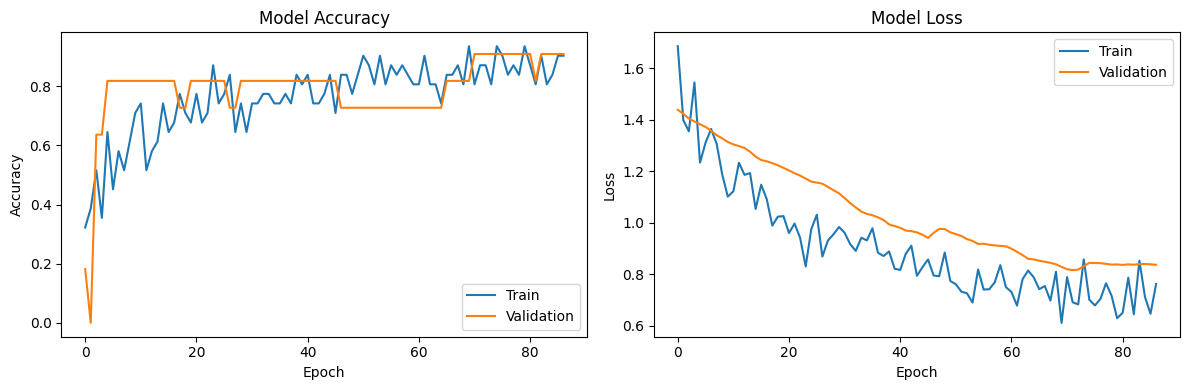

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Set random seeds for reproducibility
np.random.seed(423)
tf.random.set_seed(423)

# Load the training data
training_data = pd.read_excel(
    r'Training_Data\DATA_MODEL.xlsx')

# Create label map
label_encoder = LabelEncoder()
training_data['Label_Encoded'] = label_encoder.fit_transform(
    training_data['Label'])
label_map = {0: "New", 1: "Used", 2: "Degraded"}
print("Label mapping:", label_map)

# Group data by battery for more meaningful feature engineering
# Assuming each battery has 75 rows
num_datapoints_per_battery = 75
num_batteries = len(training_data) // num_datapoints_per_battery

# Create a battery ID column
training_data['Battery_ID'] = np.repeat(
    range(num_batteries), num_datapoints_per_battery)

# Basic features
X_basic = training_data[['Frequency', 'Real', 'Imaginary']].copy()

# Enhanced feature engineering
# 1. Impedance properties
X_basic['Impedance_Magnitude'] = np.sqrt(
    X_basic['Real']**2 + X_basic['Imaginary']**2)
X_basic['Phase_Angle'] = np.arctan2(X_basic['Imaginary'], X_basic['Real'])
X_basic['Admittance_Real'] = X_basic['Real'] / \
    (X_basic['Real']**2 + X_basic['Imaginary']**2)
X_basic['Admittance_Imag'] = -X_basic['Imaginary'] / \
    (X_basic['Real']**2 + X_basic['Imaginary']**2)

# 2. Log transformations (EIS often follows log distributions)
X_basic['Log_Frequency'] = np.log10(X_basic['Frequency'])
X_basic['Log_Impedance'] = np.log10(X_basic['Impedance_Magnitude'])

# 3. Frequency-specific features
# Normalized frequency to highlight patterns across different frequency ranges
max_freq = X_basic['Frequency'].max()
min_freq = X_basic['Frequency'].min()
X_basic['Normalized_Frequency'] = (
    X_basic['Frequency'] - min_freq) / (max_freq - min_freq)

# 4. Create battery-level features
battery_features = []

for battery_id in range(num_batteries):
    battery_data = training_data[training_data['Battery_ID'] == battery_id]

    # Get the label for this battery
    label = battery_data['Label_Encoded'].iloc[0]

    # Extract statistical features across entire spectrum
    features = {
        'Battery_ID': battery_id,
        'Label': label,
        'Mean_Real': battery_data['Real'].mean(),
        'Std_Real': battery_data['Real'].std(),
        'Mean_Imaginary': battery_data['Imaginary'].mean(),
        'Std_Imaginary': battery_data['Imaginary'].std(),
        'Mean_Magnitude': np.sqrt(battery_data['Real']**2 + battery_data['Imaginary']**2).mean(),
        'Max_Real': battery_data['Real'].max(),
        'Min_Real': battery_data['Real'].min(),
        'Max_Imaginary': battery_data['Imaginary'].max(),
        'Min_Imaginary': battery_data['Imaginary'].min(),
        'Slope_Real_Frequency': np.polyfit(np.log10(battery_data['Frequency']), battery_data['Real'], 1)[0],
        'Slope_Imag_Frequency': np.polyfit(np.log10(battery_data['Frequency']), battery_data['Imaginary'], 1)[0],
        'Low_Freq_Real_Mean': battery_data.loc[battery_data['Frequency'] < 10, 'Real'].mean(),
        'High_Freq_Real_Mean': battery_data.loc[battery_data['Frequency'] > 1000, 'Real'].mean(),
        'Low_Freq_Imag_Mean': battery_data.loc[battery_data['Frequency'] < 10, 'Imaginary'].mean(),
        'High_Freq_Imag_Mean': battery_data.loc[battery_data['Frequency'] > 1000, 'Imaginary'].mean(),
    }

    # Calculate ratios between different frequency bands
    # These can help capture characteristic shapes in EIS
    try:
        features['Real_Low_High_Ratio'] = features['Low_Freq_Real_Mean'] / \
            features['High_Freq_Real_Mean']
    except:
        features['Real_Low_High_Ratio'] = 0

    try:
        features['Imag_Low_High_Ratio'] = features['Low_Freq_Imag_Mean'] / \
            features['High_Freq_Imag_Mean']
    except:
        features['Imag_Low_High_Ratio'] = 0

    battery_features.append(features)

# Create battery-level dataframe
battery_df = pd.DataFrame(battery_features)

# Extract features and labels
X_battery = battery_df.drop(['Battery_ID', 'Label'], axis=1)
y_battery = battery_df['Label']

# Normalize battery-level features
scaler_battery = StandardScaler()
X_battery_scaled = scaler_battery.fit_transform(X_battery)

# Feature selection using Random Forest
print("Performing feature selection...")
selector = RandomForestClassifier(n_estimators=100, random_state=42)
selector.fit(X_battery_scaled, y_battery)

# Get feature importances
importances = selector.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_battery.columns

# 1. Compute mean importance threshold
mean_importance = importances.mean()

# 2. Print the threshold and feature ranking
print(f"\nMean importance threshold: {mean_importance:.4f}")
print("Features ranked by importance:")
for rank, idx in enumerate(indices, start=1):
    print(f"{rank:2d}. {feature_names[idx]:<20s} ({importances[idx]:.4f})")

# 3. Identify which features exceed the threshold
above_thresh = [(feature_names[i], imp)
                for i, imp in enumerate(importances)
                if imp > mean_importance]

print("\nFeatures above the mean threshold:")
for name, imp in sorted(above_thresh, key=lambda x: x[1], reverse=True):
    print(f" - {name:<20s} ({imp:.4f}) ✓")

# 4. Perform the selection and build your mapping as before
model_selector = SelectFromModel(selector, threshold="mean", prefit=True)
X_battery_selected = model_selector.transform(X_battery_scaled)
print(
    f"\nReduced number of features from {X_battery_scaled.shape[1]} "
    f"to {X_battery_selected.shape[1]}"
)

# 5. Create and print the mapping from reduced indices to original names
selected_mask = model_selector.get_support()
feature_mapping = {
    new_idx: feature_names[orig_idx]
    for new_idx, orig_idx in enumerate(np.where(selected_mask)[0])
}

print("\nSelected features mapping:")
for new_idx, name in feature_mapping.items():
    orig_pos = np.where(feature_names == name)[0][0]
    imp = importances[orig_pos]
    print(f"Feature_{new_idx} = {name:<20s} (importance: {imp:.4f})")


# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_battery_selected, y_battery, test_size=0.25, random_state=432, stratify=y_battery)


def create_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.005)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l2(0.005)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.005)),
        Dense(len(label_map), activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


# Create the model
model = create_model(X_train.shape[1])
model.summary()

# Calculate class weights for imbalanced data
class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weights_dict)

# Create callbacks for training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# Train with cross-validation to ensure robustness
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Train the model
print("Training the model...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=4,  # Small batch size for better generalization with small dataset
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_dict,
    verbose=1
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

# Function to preprocess and make predictions on new data


def predict_battery_state(file_path, expected_label=None):
    # Load the data
    EPS = 1e-8
    unlabeled_data = pd.read_excel(file_path)

    # Check if data has the expected number of rows
    if len(unlabeled_data) != num_datapoints_per_battery:
        print(
            f"Warning: File {file_path.split('/')[-1]} has {len(unlabeled_data)} rows instead of expected {num_datapoints_per_battery}")

    # Extract basic features
    X_unlabeled = unlabeled_data[['Frequency', 'Real', 'Imaginary']].copy()

    # Apply the same feature engineering as training data
    X_unlabeled['Impedance_Magnitude'] = np.sqrt(
        X_unlabeled['Real']**2 + X_unlabeled['Imaginary']**2)
    X_unlabeled['Phase_Angle'] = np.arctan2(
        X_unlabeled['Imaginary'], X_unlabeled['Real'])
    X_unlabeled['Admittance_Real'] = X_unlabeled['Real'] / \
        (X_unlabeled['Real']**2 + X_unlabeled['Imaginary']**2)
    X_unlabeled['Admittance_Imag'] = -X_unlabeled['Imaginary'] / \
        (X_unlabeled['Real']**2 + X_unlabeled['Imaginary']**2)

    X_basic['Log_Frequency'] = np.nan
    X_basic['Log_Impedance'] = np.nan

    # only take logs where >0
    mask_freq = X_basic['Frequency'] > 0
    mask_imp = X_basic['Impedance_Magnitude'] > 0

    X_basic.loc[mask_freq, 'Log_Frequency'] = np.log10(
        X_basic.loc[mask_freq, 'Frequency'])
    X_basic.loc[mask_imp,  'Log_Impedance'] = np.log10(
        X_basic.loc[mask_imp,  'Impedance_Magnitude'])

    X_unlabeled['Normalized_Frequency'] = (
        X_unlabeled['Frequency'] - min_freq) / (max_freq - min_freq)

    # Create battery-level features
    battery_features = {
        'Mean_Real': X_unlabeled['Real'].mean(),
        'Std_Real': X_unlabeled['Real'].std(),
        'Mean_Imaginary': X_unlabeled['Imaginary'].mean(),
        'Std_Imaginary': X_unlabeled['Imaginary'].std(),
        'Mean_Magnitude': X_unlabeled['Impedance_Magnitude'].mean(),
        'Max_Real': X_unlabeled['Real'].max(),
        'Min_Real': X_unlabeled['Real'].min(),
        'Max_Imaginary': X_unlabeled['Imaginary'].max(),
        'Min_Imaginary': X_unlabeled['Imaginary'].min(),
        'Slope_Real_Frequency': np.polyfit(np.log10(X_unlabeled['Frequency']), X_unlabeled['Real'], 1)[0],
        'Slope_Imag_Frequency': np.polyfit(np.log10(X_unlabeled['Frequency']), X_unlabeled['Imaginary'], 1)[0],
        'Low_Freq_Real_Mean': X_unlabeled.loc[X_unlabeled['Frequency'] < 10, 'Real'].mean(),
        'High_Freq_Real_Mean': X_unlabeled.loc[X_unlabeled['Frequency'] > 1000, 'Real'].mean(),
        'Low_Freq_Imag_Mean': X_unlabeled.loc[X_unlabeled['Frequency'] < 10, 'Imaginary'].mean(),
        'High_Freq_Imag_Mean': X_unlabeled.loc[X_unlabeled['Frequency'] > 1000, 'Imaginary'].mean(),
    }

    # Calculate ratios
    try:
        battery_features['Real_Low_High_Ratio'] = battery_features['Low_Freq_Real_Mean'] / \
            battery_features['High_Freq_Real_Mean']
    except:
        battery_features['Real_Low_High_Ratio'] = 0

    try:
        battery_features['Imag_Low_High_Ratio'] = battery_features['Low_Freq_Imag_Mean'] / \
            battery_features['High_Freq_Imag_Mean']
    except:
        battery_features['Imag_Low_High_Ratio'] = 0

    # Convert to DataFrame
    battery_features_df = pd.DataFrame([battery_features])

    # Normalize
    battery_features_scaled = scaler_battery.transform(battery_features_df)

    # Apply feature selection
    battery_features_selected = model_selector.transform(
        battery_features_scaled)

    # Make prediction
    prediction_probs = model.predict(battery_features_selected)
    predicted_label_index = np.argmax(prediction_probs[0])
    predicted_label = label_map[predicted_label_index]
    confidence = prediction_probs[0][predicted_label_index]

    # Print results
    file_name = file_path.split('/')[-1]
    result_str = f"File: {file_name}"

    if expected_label:
        result_str += f" | Expected: {expected_label}"

    result_str += f" | Predicted: {predicted_label} (Confidence: {confidence:.4f})"
    print(result_str)

    # Print all class probabilities for debugging
    for i, prob in enumerate(prediction_probs[0]):
        print(f"  - {label_map[i]}: {prob:.4f}")

    return predicted_label, confidence, prediction_probs[0]

In [3]:
# After your model.fit(…) call and evaluation...

# 1. Save the Keras model
import joblib
model.save('battery_classifier.keras')
print("✅ Model saved to battery_classifier.keras")

# 2. Save your scaler and feature-selector so you can apply the exact same preprocessing later

joblib.dump(scaler_battery,   'scaler_battery.pkl')
joblib.dump(model_selector,   'model_selector.pkl')
print("✅ Scaler saved to scaler_battery.pkl")
print("✅ Selector saved to model_selector.pkl")

✅ Model saved to battery_classifier.keras
✅ Scaler saved to scaler_battery.pkl
✅ Selector saved to model_selector.pkl


=== BATTERY CLASSIFICATION SYSTEM ===

1. Running batch predictions on all evaluation data...
2. Generating summary results...

=== SUMMARY RESULTS ===

Before and After Processing Counts:
  New: Before=7 files, After=7 files
  Used: Before=9 files, After=9 files
  Degraded: Before=2 files, After=2 files

New: processed 7 files, 7/7 correct (100.00%)
  ✓ Cleaned_C110.xlsx    → expected New      : predicted New      (conf 0.70)
  ✓ Cleaned_C180.xlsx    → expected New      : predicted New      (conf 0.64)
  ✓ Cleaned_C185.xlsx    → expected New      : predicted New      (conf 0.69)
  ✓ Cleaned_C200.xlsx    → expected New      : predicted New      (conf 0.89)
  ✓ Cleaned_CELL2.xlsx   → expected New      : predicted New      (conf 0.62)
  ✓ Cleaned_N5.xlsx      → expected New      : predicted New      (conf 0.62)
  ✓ Cleaned_N6.xlsx      → expected New      : predicted New      (conf 0.85)
  Prediction breakdown:
    New     : 7/7 (100.00%)

Used: processed 9 files, 8/9 correct (88.89%)
  

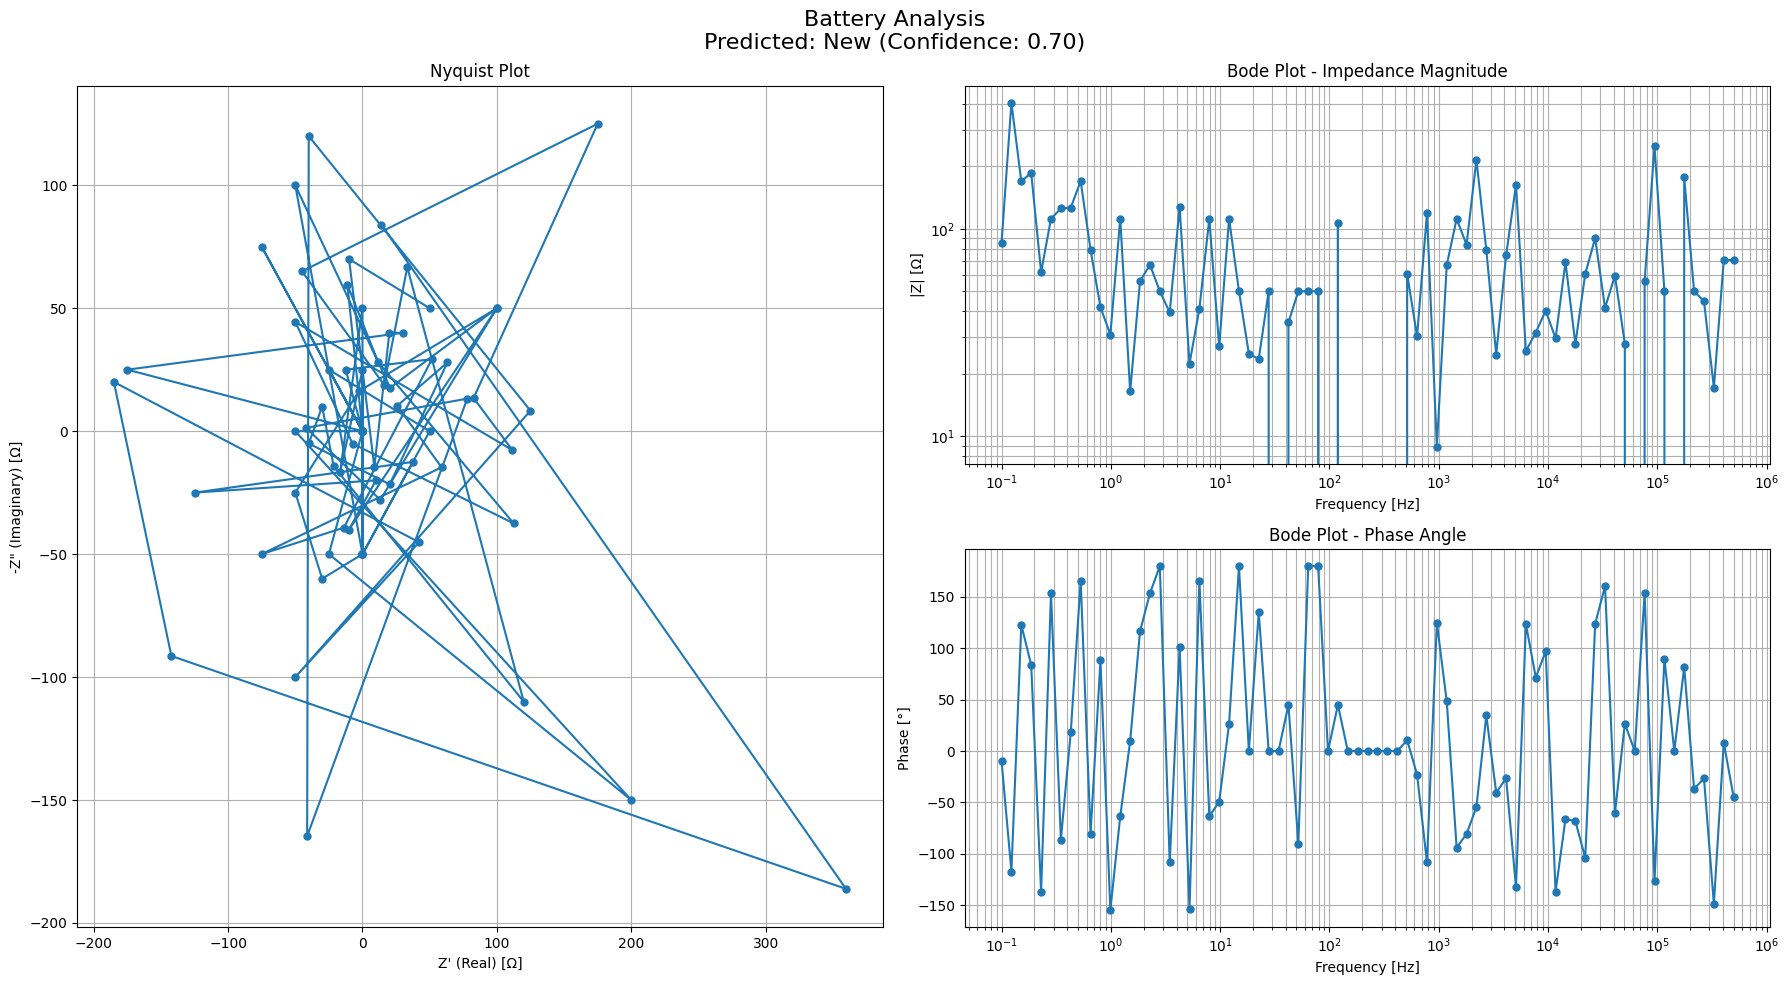

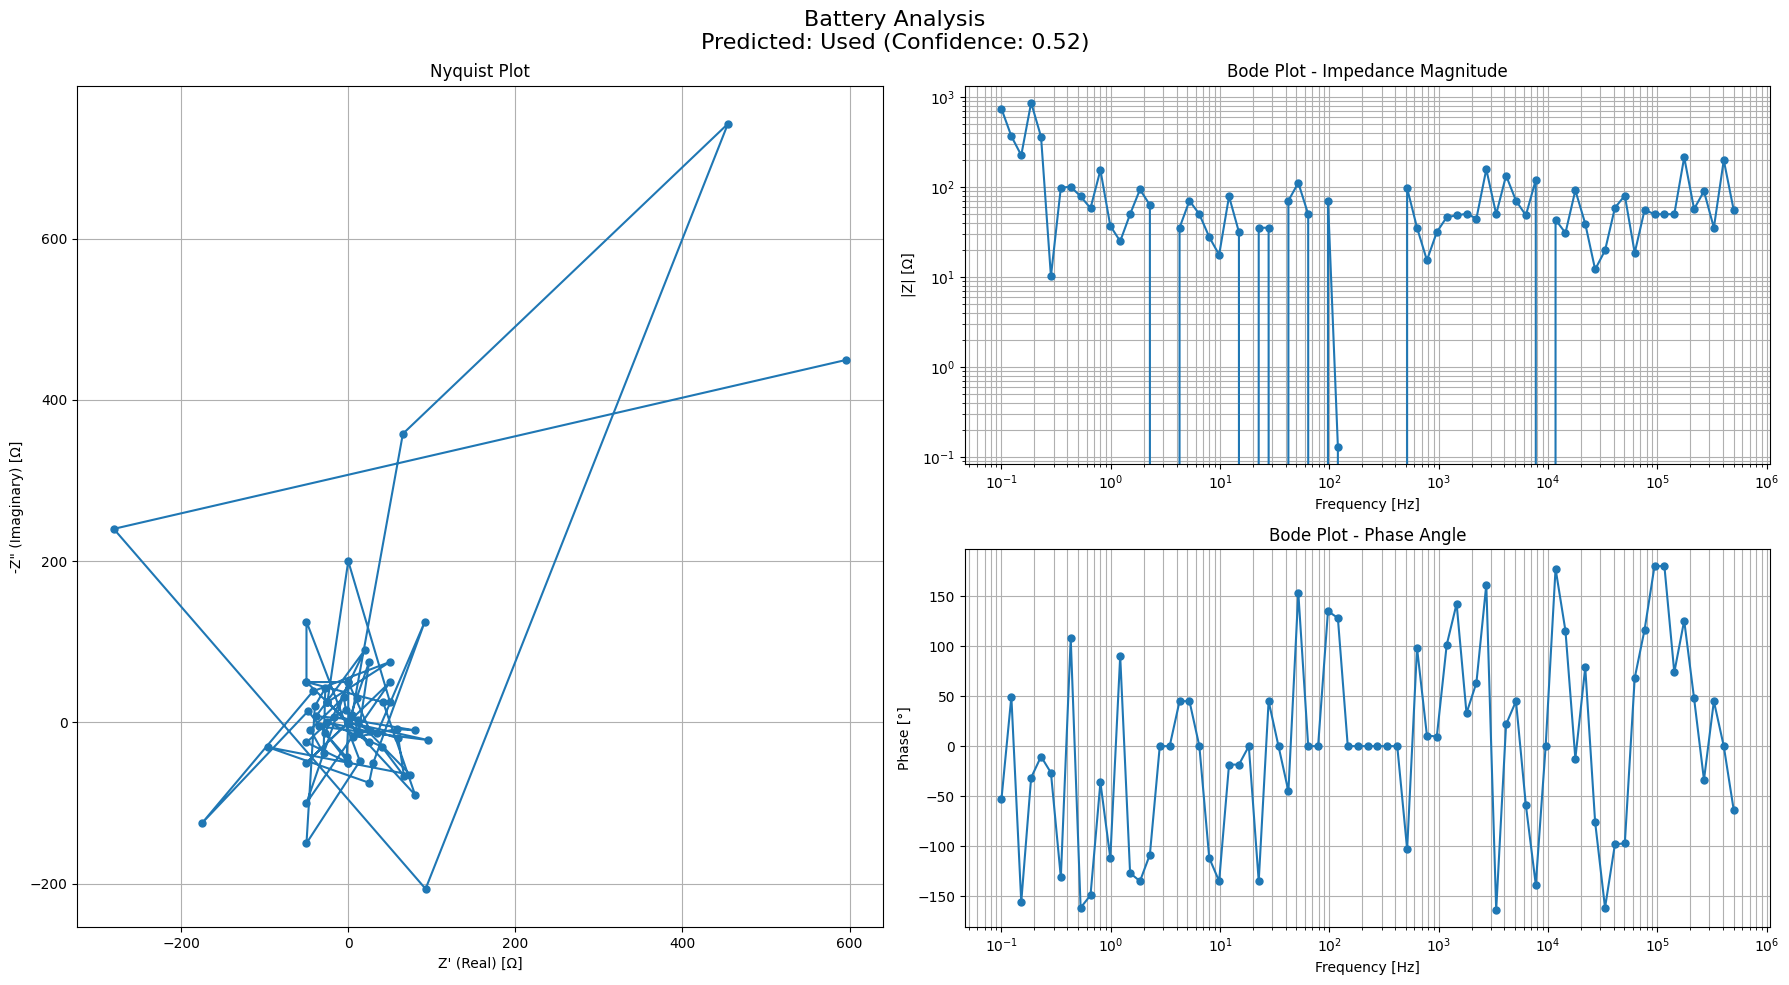

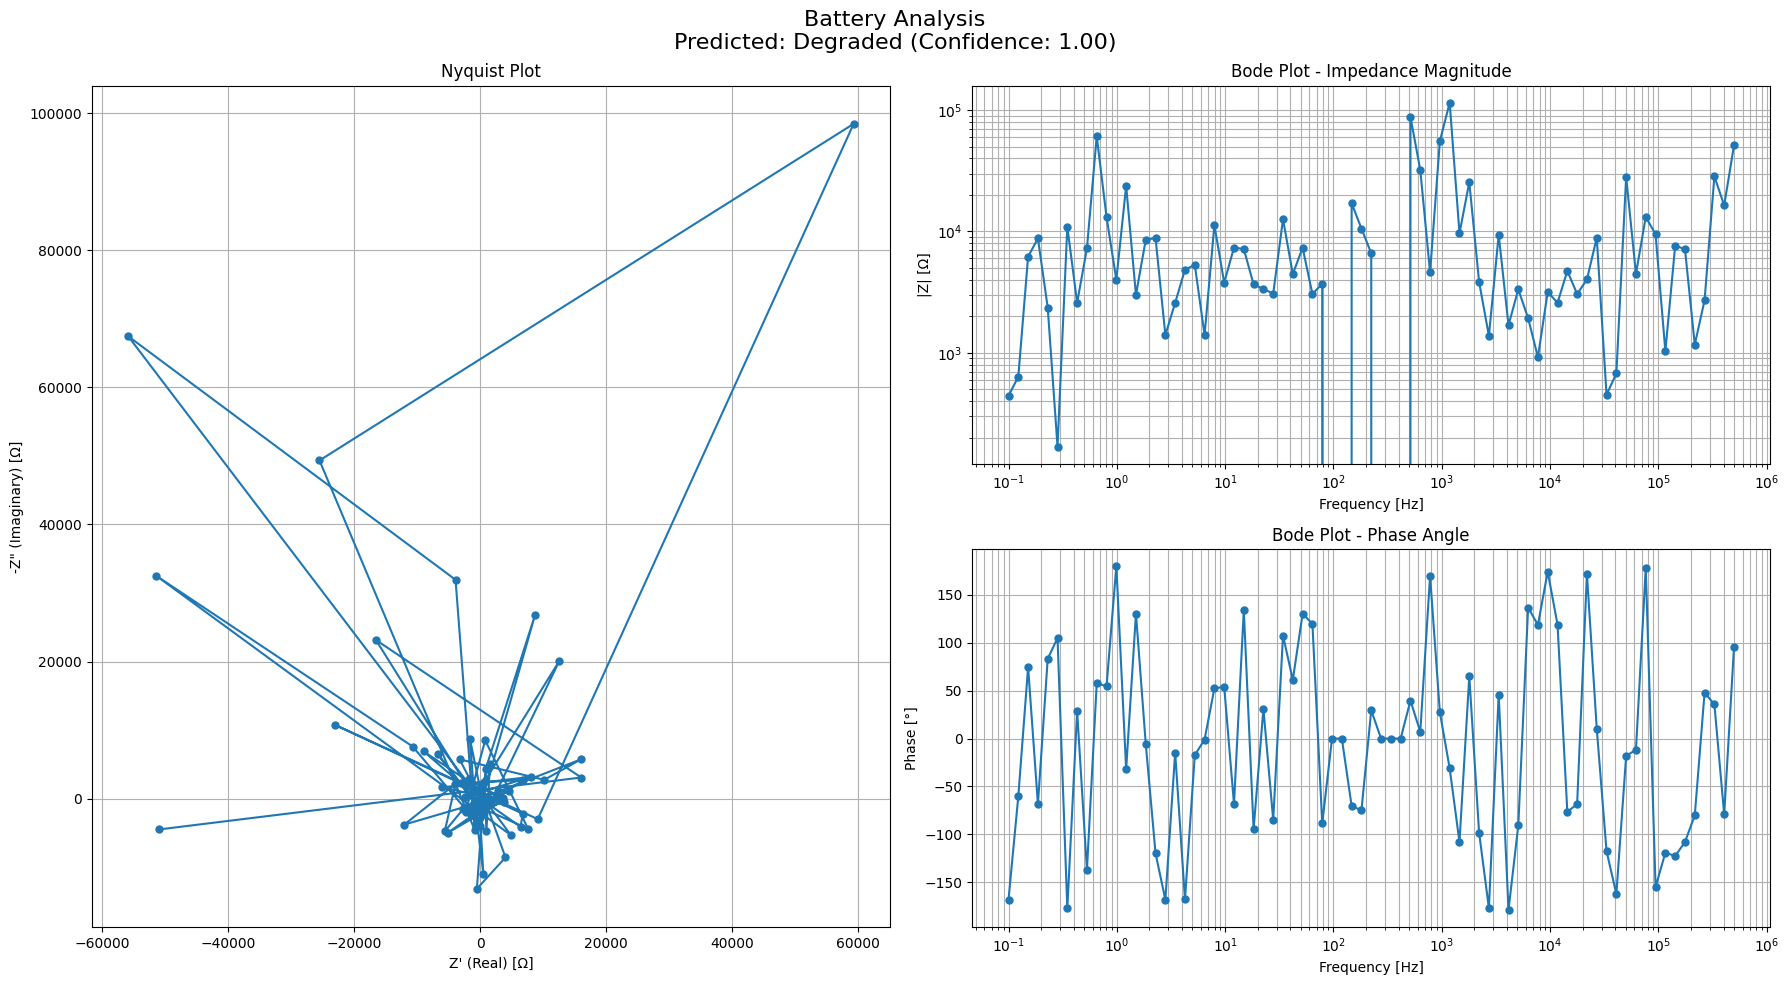

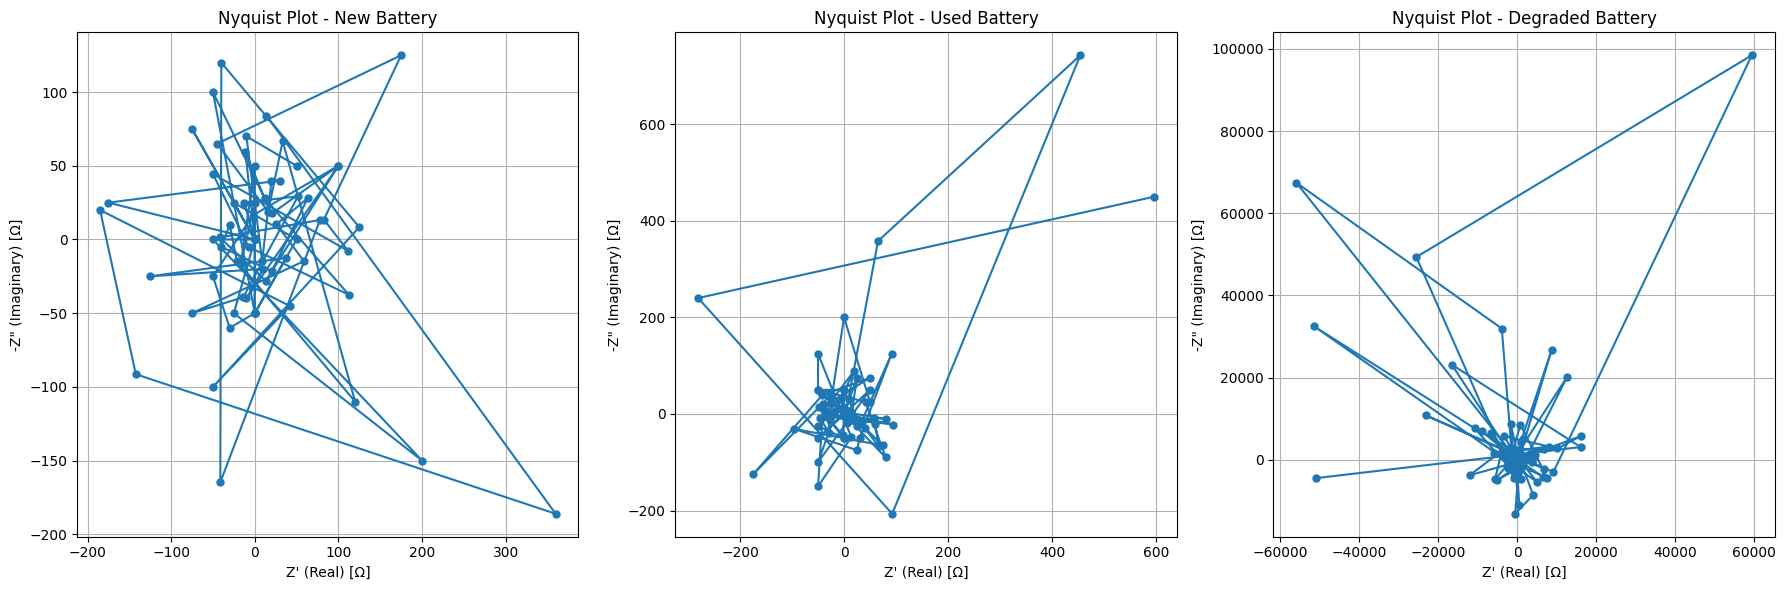

In [4]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# 1) Load saved artifacts and model
model = tf.keras.models.load_model('battery_classifier.keras')
scaler_battery = joblib.load('scaler_battery.pkl')
model_selector = joblib.load('model_selector.pkl')

# 2) Recompute your training min/max freq for normalization:
training_data = pd.read_excel(r'Training_Data/DATA_MODEL.xlsx')
min_freq = training_data['Frequency'].min()
max_freq = training_data['Frequency'].max()

# 3) Constants
EPS = 1e-8  # number close to zero para ma avoid mag divide by zero if ever
num_datapoints_per_battery = 75
label_map = {0: "New", 1: "Used", 2: "Degraded"}


def extract_features(df):
    """Extract features from an Excel file with battery data"""
    # Basic features
    X = pd.DataFrame({
        'Real': df['Real'],
        'Imaginary': df['Imaginary'],
        'Frequency': df['Frequency']
    })

    # Calculated Features
    X['Impedance_Magnitude'] = np.sqrt(X['Real']**2 + X['Imaginary']**2)
    X['Phase_Angle'] = np.arctan2(X['Imaginary'], X['Real'])
    X['Admittance_Real'] = X['Real'] / (X['Real']**2 + X['Imaginary']**2 + EPS)
    X['Admittance_Imag'] = -X['Imaginary'] / \
        (X['Real']**2 + X['Imaginary']**2 + EPS)
    X['Log_Frequency'] = np.log10(X['Frequency'] + EPS)
    X['Log_Impedance'] = np.log10(X['Impedance_Magnitude'] + EPS)
    X['Normalized_Frequency'] = (
        X['Frequency'] - min_freq) / (max_freq - min_freq + EPS)

    # Battery-level statistical features
    feats = {
        'Mean_Real': X['Real'].mean(),
        'Std_Real': X['Real'].std(),
        'Mean_Imaginary': X['Imaginary'].mean(),
        'Std_Imaginary': X['Imaginary'].std(),
        'Mean_Magnitude': X['Impedance_Magnitude'].mean(),
        'Max_Real': X['Real'].max(),
        'Min_Real': X['Real'].min(),
        'Max_Imaginary': X['Imaginary'].max(),
        'Min_Imaginary': X['Imaginary'].min(),
        'Slope_Real_Frequency': np.polyfit(np.log10(X['Frequency']+EPS), X['Real'], 1)[0],
        'Slope_Imag_Frequency': np.polyfit(np.log10(X['Frequency']+EPS), X['Imaginary'], 1)[0],
        'Low_Freq_Real_Mean': X.loc[X['Frequency'] < 10, 'Real'].mean(),
        'High_Freq_Real_Mean': X.loc[X['Frequency'] > 1000, 'Real'].mean(),
        'Low_Freq_Imag_Mean': X.loc[X['Frequency'] < 10, 'Imaginary'].mean(),
        'High_Freq_Imag_Mean': X.loc[X['Frequency'] > 1000, 'Imaginary'].mean(),
    }

    # Ratio features
    feats['Real_Low_High_Ratio'] = feats['Low_Freq_Real_Mean'] / \
        (feats['High_Freq_Real_Mean'] + EPS)
    feats['Imag_Low_High_Ratio'] = feats['Low_Freq_Imag_Mean'] / \
        (feats['High_Freq_Imag_Mean'] + EPS)

    return X, feats


def predict_from_saved(file_path):
    """Predict battery state from Excel file and return features and visualization data"""
    df = pd.read_excel(file_path)

    # Extract features
    X, feats = extract_features(df)

    # Scale and select features
    batch = pd.DataFrame([feats])
    scaled = scaler_battery.transform(batch)
    sel = model_selector.transform(scaled)

    # Get feature vectors
    feature_vector_raw = pd.DataFrame([feats])
    feature_vector_scaled = pd.DataFrame(scaled, columns=batch.columns)
    feature_vector_selected = pd.DataFrame(sel)

    # Predict
    probs = model.predict(sel, verbose=0)[0]
    idx = np.argmax(probs)

    # Get all probabilities for all classes
    class_probs = {label_map[i]: float(probs[i]) for i in range(len(probs))}

    return {
        "prediction": label_map[idx],
        "confidence": float(probs[idx]),
        "class_probabilities": class_probs,
        "feature_vectors": {
            "raw": feature_vector_raw.to_dict('records')[0],
            "scaled": feature_vector_scaled.to_dict('records')[0],
            "selected": feature_vector_selected.to_dict('records')[0]
        },
        "visualization_data": {
            "frequency": df['Frequency'].tolist(),
            "real": df['Real'].tolist(),
            "imaginary": df['Imaginary'].tolist(),
            "impedance_magnitude": X['Impedance_Magnitude'].tolist(),
            "phase_angle": X['Phase_Angle'].tolist()
        }
    }


def plot_battery_data(data, title="Battery EIS Analysis"):
    """Create Bode and Nyquist plots from battery data"""
    freq = data["visualization_data"]["frequency"]
    real = data["visualization_data"]["real"]
    imag = data["visualization_data"]["imaginary"]
    mag = data["visualization_data"]["impedance_magnitude"]
    phase = data["visualization_data"]["phase_angle"]

    # Create figure with subplots
    fig = plt.figure(figsize=(18, 10))
    gs = GridSpec(2, 2, figure=fig)

    # Nyquist plot (-Imag vs Real)
    ax1 = fig.add_subplot(gs[:, 0])
    ax1.plot(-np.array(imag), real, 'o-', markersize=5)
    ax1.set_xlabel('Z\' (Real) [Ω]')
    ax1.set_ylabel('-Z\" (Imaginary) [Ω]')
    ax1.set_title('Nyquist Plot')
    ax1.grid(True)

    # Bode plot - Magnitude
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.loglog(freq, mag, 'o-', markersize=5)
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('|Z| [Ω]')
    ax2.set_title('Bode Plot - Impedance Magnitude')
    ax2.grid(True, which="both")

    # Bode plot - Phase
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.semilogx(freq, np.degrees(phase), 'o-', markersize=5)
    ax3.set_xlabel('Frequency [Hz]')
    ax3.set_ylabel('Phase [°]')
    ax3.set_title('Bode Plot - Phase Angle')
    ax3.grid(True, which="both")

    # Add prediction result to the overall title
    prediction = data["prediction"]
    confidence = data["confidence"]
    main_title = f"{title}\nPredicted: {prediction} (Confidence: {confidence:.2f})"
    fig.suptitle(main_title, fontsize=16)

    plt.tight_layout()
    return fig


def display_bode_vectors(data, num_points=75):
    """
    Display the vectors used in creating the Bode plot

    Parameters:
    -----------
    data : dict
        Dictionary containing visualization data from predict_from_saved function
    num_points : int, optional
        Number of data points to display (default: 75)
    """
    # Extract the relevant vectors from the data
    freq = data["visualization_data"]["frequency"]
    mag = data["visualization_data"]["impedance_magnitude"]
    phase = data["visualization_data"]["phase_angle"]
    real = data["visualization_data"]["real"]
    imag = data["visualization_data"]["imaginary"]

    # Convert phase from radians to degrees for display
    phase_degrees = np.degrees(phase)

    # Create a DataFrame for better display
    df = pd.DataFrame({
        'Frequency (Hz)': freq,
        'Impedance |Z| (Ω)': mag,
        'Phase Angle (°)': phase_degrees,
        'Real Z\' (Ω)': real,
        'Imaginary Z\" (Ω)': imag
    })

    # Sort by frequency to ensure data is in order
    df = df.sort_values(by='Frequency (Hz)')

    # Select a subset of points to display
    if len(df) > num_points:
        # Take points spread evenly across the frequency range
        indices = np.linspace(0, len(df)-1, num_points, dtype=int)
        df_display = df.iloc[indices]
    else:
        df_display = df

    # Display the data
    print(
        f"\n=== BODE PLOT VECTORS (showing {len(df_display)} of {len(df)} points) ===")
    print("\nData used for Bode and Nyquist plots:")
    print(df_display.to_string(index=False, float_format=lambda x: f"{x:.4e}" if abs(
        x) > 1000 or abs(x) < 0.01 else f"{x:.4f}"))

    # Display some statistics
    print("\nVector Statistics:")
    print(f"Frequency Range: {min(freq):.2e} Hz to {max(freq):.2e} Hz")
    print(f"Impedance Magnitude Range: {min(mag):.4f} Ω to {max(mag):.4f} Ω")
    print(
        f"Phase Angle Range: {min(phase_degrees):.2f}° to {max(phase_degrees):.2f}°")

    return df


def run_batch_predictions():
    """Run predictions on all evaluation data and collect results"""
    evaluation_dir = 'Evaluation_Data'
    results = {
        'New': {'files': [], 'correct': 0, 'before': 0, 'after': 0},
        'Used': {'files': [], 'correct': 0, 'before': 0, 'after': 0},
        'Degraded': {'files': [], 'correct': 0, 'before': 0, 'after': 0}
    }

    all_data = []

    for label_folder in ['new', 'used', 'degraded']:
        expected = label_folder.capitalize()
        folder = os.path.join(evaluation_dir, label_folder)

        # Count files before processing
        xlsx_files = [f for f in os.listdir(
            folder) if f.lower().endswith('.xlsx')]
        results[expected]['before'] = len(xlsx_files)

        for fname in sorted(xlsx_files):
            path = os.path.join(folder, fname)
            result_data = predict_from_saved(path)
            pred = result_data["prediction"]
            conf = result_data["confidence"]
            is_correct = (pred == expected)

            # Store full result data
            file_result = {
                'filename': fname,
                'path': path,
                'expected': expected,
                'predicted': pred,
                'confidence': conf,
                'correct': is_correct,
                'data': result_data
            }

            results[expected]['files'].append(file_result)
            all_data.append(file_result)

            if is_correct:
                results[expected]['correct'] += 1

        # Count files after processing
        results[expected]['after'] = len(results[expected]['files'])

    return results, all_data


def display_battery_analysis(file_path=None, result_data=None):
    """Display comprehensive analysis for a single battery file"""
    if file_path is not None and result_data is None:
        result_data = predict_from_saved(file_path)

    # Extract the filename from the path if available
    title = os.path.basename(file_path) if file_path else "Battery Analysis"

    # Create plots
    fig = plot_battery_data(result_data, title)

    vectors_df = display_bode_vectors(result_data)

    # Display feature importance
    print(f"\n=== PREDICTION RESULTS: {title} ===")
    print(f"Predicted class: {result_data['prediction']}")
    print(f"Confidence: {result_data['confidence']:.4f}")
    print("\nClass probabilities:")
    for label, prob in result_data['class_probabilities'].items():
        print(f"  {label}: {prob:.4f}")

    print("\n=== FEATURE VECTORS ===")
    print("\nTop 10 Raw Features:")
    for i, (k, v) in enumerate(sorted(result_data['feature_vectors']['raw'].items(),
                                      key=lambda x: abs(x[1]), reverse=True)[:10]):
        print(f"  {k}: {v:.4f}")

    print("\nTop Selected Features (after feature selection):")
    for i, (k, v) in enumerate(sorted(result_data['feature_vectors']['selected'].items(),
                                      key=lambda x: abs(x[1]), reverse=True)[:10]):
        print(f"  Feature_{k}: {v:.4f}")

    return fig


def print_summary_results(results):
    """Print summary of all battery predictions"""
    total_files = sum(len(data['files']) for data in results.values())
    total_correct = sum(data['correct'] for data in results.values())

    print("\n=== SUMMARY RESULTS ===\n")
    print("Before and After Processing Counts:")
    for true_label, data in results.items():
        print(
            f"  {true_label}: Before={data['before']} files, After={data['after']} files")
    print()

    for true_label, data in results.items():
        files = data['files']
        n = len(files)
        c = data['correct']
        pred_counts = Counter(f['predicted'] for f in files)

        print(f"{true_label}: processed {n} files, {c}/{n} correct ({c/n:.2%})")
        for f in files:
            mark = '✓' if f['correct'] else '✗'
            print(
                f"  {mark} {f['filename']:20s} → expected {true_label:8s} : predicted {f['predicted']:8s} (conf {f['confidence']:.2f})")

        print("  Prediction breakdown:")
        for lbl, cnt in pred_counts.items():
            print(f"    {lbl:8s}: {cnt}/{n} ({cnt/n:.2%})")
        print()

    print(
        f"TOTAL: {total_correct}/{total_files} correct ({total_correct/total_files:.2%})")
    overall_counts = Counter(pred for data in results.values()
                             for pred in (f['predicted'] for f in data['files']))
    print("Overall prediction breakdown:")
    for lbl, cnt in overall_counts.items():
        print(f"  {lbl:8s}: {cnt}/{total_files} ({cnt/total_files:.2%})")


def create_comparison_plots(results):
    """Create comparison plots for New, Used, and Degraded batteries"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    labels = ['New', 'Used', 'Degraded']

    for i, label in enumerate(labels):
        ax = axes[i]

        # Get one example from each category
        if results[label]['files']:
            example = results[label]['files'][0]
            data = example['data']

            # Plot Nyquist
            real = data["visualization_data"]["real"]
            imag = data["visualization_data"]["imaginary"]
            ax.plot(-np.array(imag), real, 'o-', markersize=5)
            ax.set_xlabel('Z\' (Real) [Ω]')
            ax.set_ylabel('-Z\" (Imaginary) [Ω]')
            ax.set_title(f'Nyquist Plot - {label} Battery')
            ax.grid(True)

    plt.tight_layout()
    return fig


def main():
    print("=== BATTERY CLASSIFICATION SYSTEM ===\n")
    print("1. Running batch predictions on all evaluation data...")
    results, all_data = run_batch_predictions()

    print("2. Generating summary results...")
    print_summary_results(results)

    print("\n3. Displaying analysis for example batteries...\n")

    # Analysis for one battery from each category
    for category in ['New', 'Used', 'Degraded']:
        if results[category]['files']:
            # 0 here means first battery on each category
            example = results[category]['files'][0]
            print(f"\n\n=== EXAMPLE ANALYSIS: {category} BATTERY ===")
            fig = display_battery_analysis(result_data=example['data'])

            # Display a subset of the Bode vectors for this example
            print(f"\nBode vectors for example {category} battery:")
            display_bode_vectors(example['data'], num_points=75)

            plt.figure(fig.number)
            plt.savefig(f"example_{category.lower()}_battery.png")

    print("\n4. Creating comparison plots...")
    comparison_fig = create_comparison_plots(results)
    plt.figure(comparison_fig.number)
    plt.savefig("battery_comparison.png")

    print("\nAnalysis complete! Visualizations saved as PNG files.")
    print("\nTo analyze a specific battery file, use:")
    print("display_battery_analysis('path/to/your/battery_file.xlsx')")


if __name__ == "__main__":
    main()
